In [26]:
import warnings
warnings.filterwarnings("ignore")

import env
import Liam_wrangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import viz_kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [27]:
train = pd.read_csv('train_zillow.csv')

In [30]:
def cluster(train):

    X = train[['quality', 'house_age', 'room_count']]

    scaler = StandardScaler().fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

    from sklearn.cluster import KMeans
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')
   
    #define the thing
    kmeans = KMeans(n_clusters=5)

    # fit the thing
    kmeans.fit(X_scaled)

    # Use (predict using) the thing 
    kmeans.predict(X_scaled)
    # Make a dataframe 
    
    train['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

    X_scaled['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

    # Cluster Centers aka (centroids)
    kmeans.cluster_centers_
    
    centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

    # lets visualize the clusters along with the centers on (scaled data).

    plt.figure(figsize=(20, 40))

    # scatter plot of data with hue for cluster
    plt.subplot(5,1,1)
    sns.scatterplot(x = 'quality', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
    centroids_scaled.plot.scatter(x = 'room_count', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    plt.subplot(5,1,2)
    sns.scatterplot(x = 'house_age', y= 'quality', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
    centroids_scaled.plot.scatter(x = 'house_age', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    plt.subplot(5,1,3)
    sns.scatterplot(x = 'house_age', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
    centroids_scaled.plot.scatter(x = 'house_age', y = 'room_count', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    plt.legend();

    # lets visualize the clusters along with the centers on (scaled data).

    plt.figure(figsize=(14, 9))

    # scatter plot of data with hue for cluster

    sns.relplot(x = 'house_age', y= 'quality', data = X_scaled, col = X_scaled.quality_houseage_roomcount_cluster, col_wrap = 2, hue = train.level_of_log_error)

    # plot cluster centers (centroids)

    # centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

    plt.show();

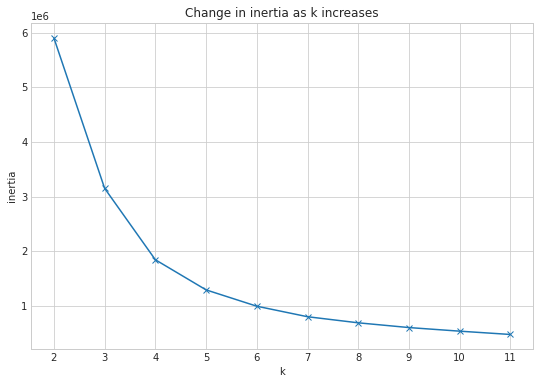

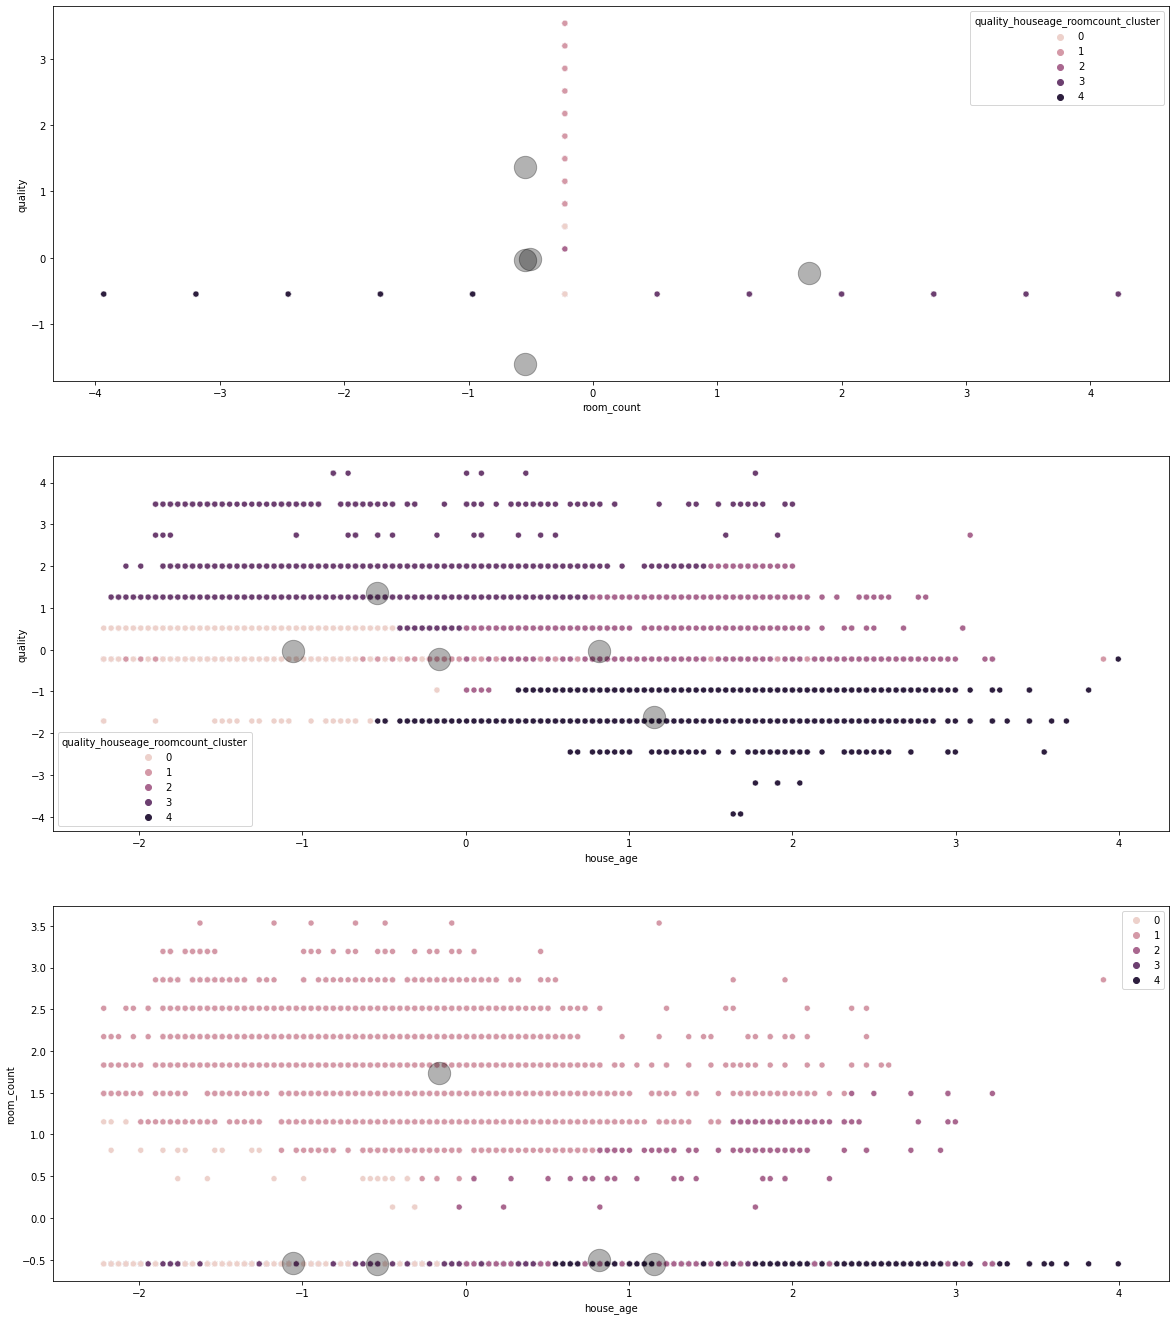

<Figure size 1008x648 with 0 Axes>

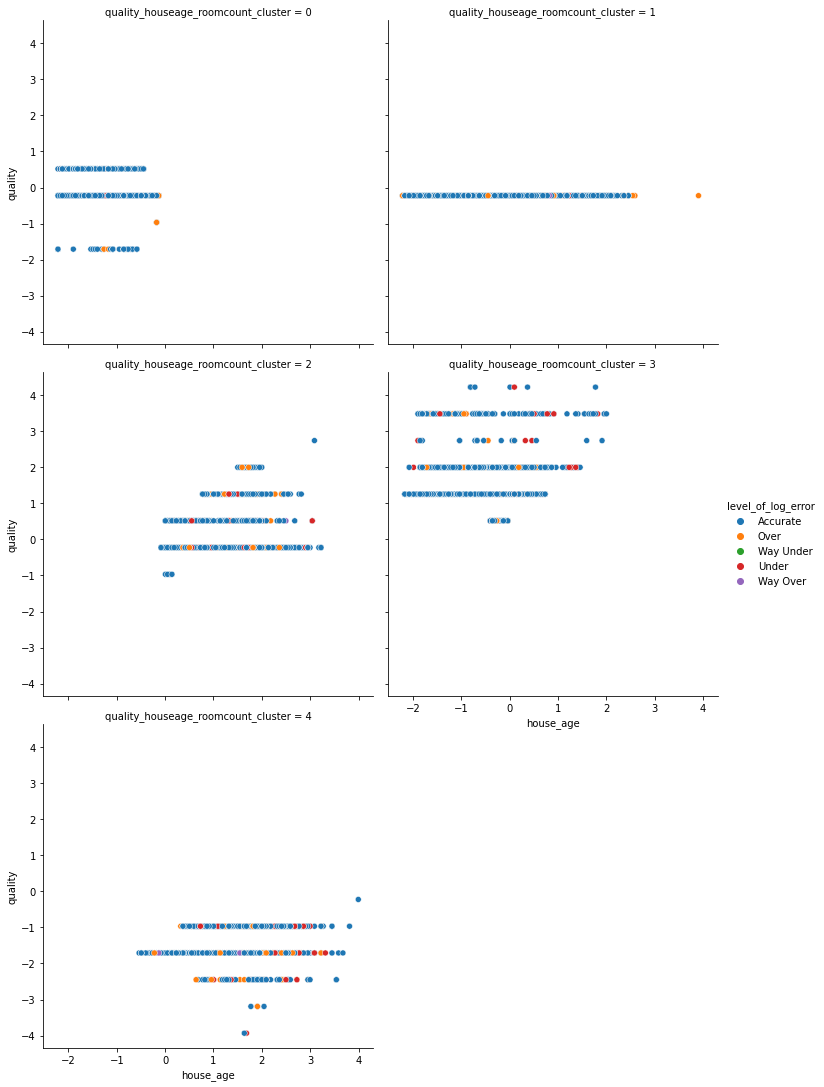

In [31]:
cluster(train)

In [39]:
def get_dum_and_plot(train):   
    dummy_df =  pd.get_dummies(train['quality_houseage_roomcount_cluster'])
    dummy_df.columns = ['zero', 'one', 'two', 'three', 'four']
    df = pd.concat([train, dummy_df], axis=1)

    df1 = df.groupby(['zero','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()
    df1.head()

    df2= df.groupby(['one','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df2.head()

    df3= df.groupby(['two','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df3.head()

    df4= df.groupby(['three','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df4.head()

    df5 = df.groupby(['four','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()
    df5.head()

    
    # Plot the clusters
    plt.figure(figsize=(20, 40))

    
    plt.subplot(5,1,1)
    plt.title("Percents of Each Log Error Level for Homeq = 0", size=20, color='black')

    sns.barplot(y=df.zero, x='level_of_log_error', data=df,

                   palette='viridis')

    plt.subplot(5,1,2)
    plt.title("Percents of Each Log Error Level Older Homes Low Quality", size=20, color='black')
    sns.barplot(y=df.one, x='level_of_log_error', data=df,
                   palette='viridis')

    plt.subplot(5,1,3)
    plt.title("Percents of Each Log Error Level Younger Homes Avg. Quality", size=20, color='black')
    sns.barplot(y=df.two, x='level_of_log_error', data=df,
                   palette='viridis')

    plt.subplot(5,1,4)
    plt.title("Percents of Each Log Error Level Newer Homes High Quality", size=20, color='black')
    sns.barplot(y=df.three, x='level_of_log_error', data=df,
                   palette='viridis')
    
    plt.subplot(5,1,5)
    plt.title("Percents of Each Log Error Level Older Homes High Quality", size=20, color='black')
    sns.barplot(y=df.four, x='level_of_log_error', data=df,
                   palette='viridis')


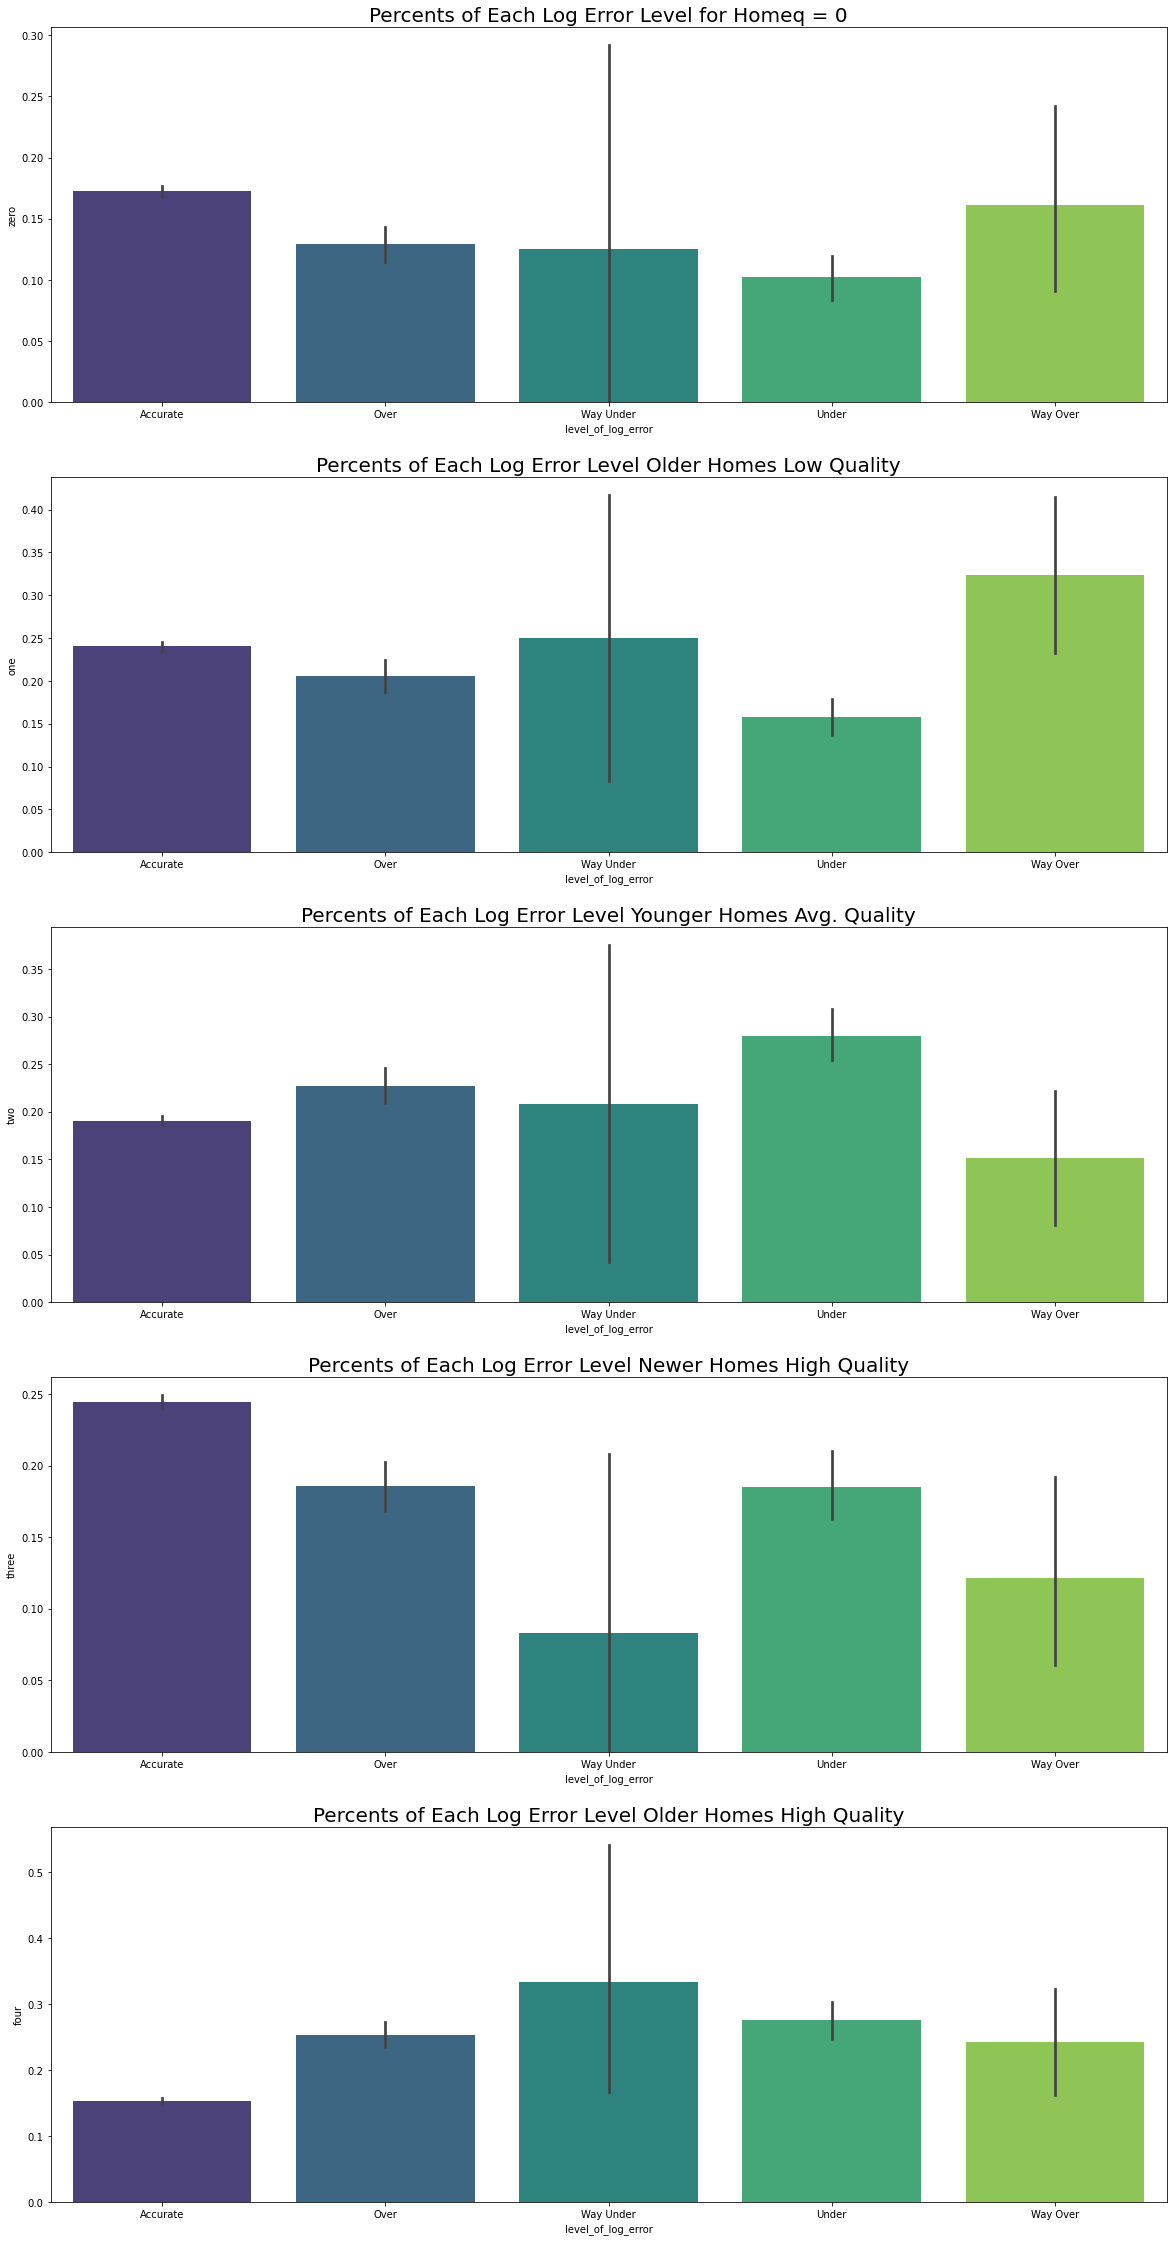

In [40]:
get_dum_and_plot(train)

In [41]:
def cluster_longitude_latitude_houseage(train): 
    X = train[['longitude', 'latitude', 'house_age']]

    scaler = StandardScaler().fit(X)
    X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

    # lets plot inertia vs k
    from sklearn.cluster import KMeans
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')

    #define the thing
    kmeans = KMeans(n_clusters=5)

    # fit the thing
    kmeans.fit(X_scaled)

    # Use (predict using) the thing 
    kmeans.predict(X_scaled)

    train['longitude_latitude_houseage_cluster'] = kmeans.predict(X_scaled)


    X_scaled['longitude_latitude_houseage_cluster'] = kmeans.predict(X_scaled)

    # Cluster Centers aka (centroids)
    kmeans.cluster_centers_

    # Make a dataframe 
    centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

    # Plot the cluster
    # lets visualize the clusters along with the centers on (scaled data).

    plt.figure(figsize=(20, 20))

    # scatter plot of data with hue for cluster
    sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = X_scaled.longitude_latitude_houseage_cluster, palette='viridis')
    centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)
    plt.legend();


    # Plot the clusers in relplot

    plt.figure(figsize=(14, 9))
    sns.relplot(x = 'longitude', y= 'latitude', data = X_scaled, col = X_scaled.longitude_latitude_houseage_cluster, col_wrap = 2, hue = train.level_of_log_error)
    plt.show();

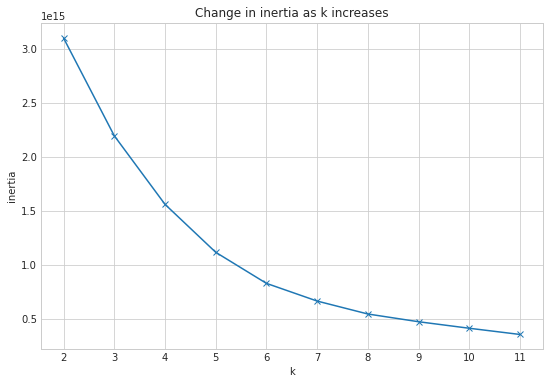

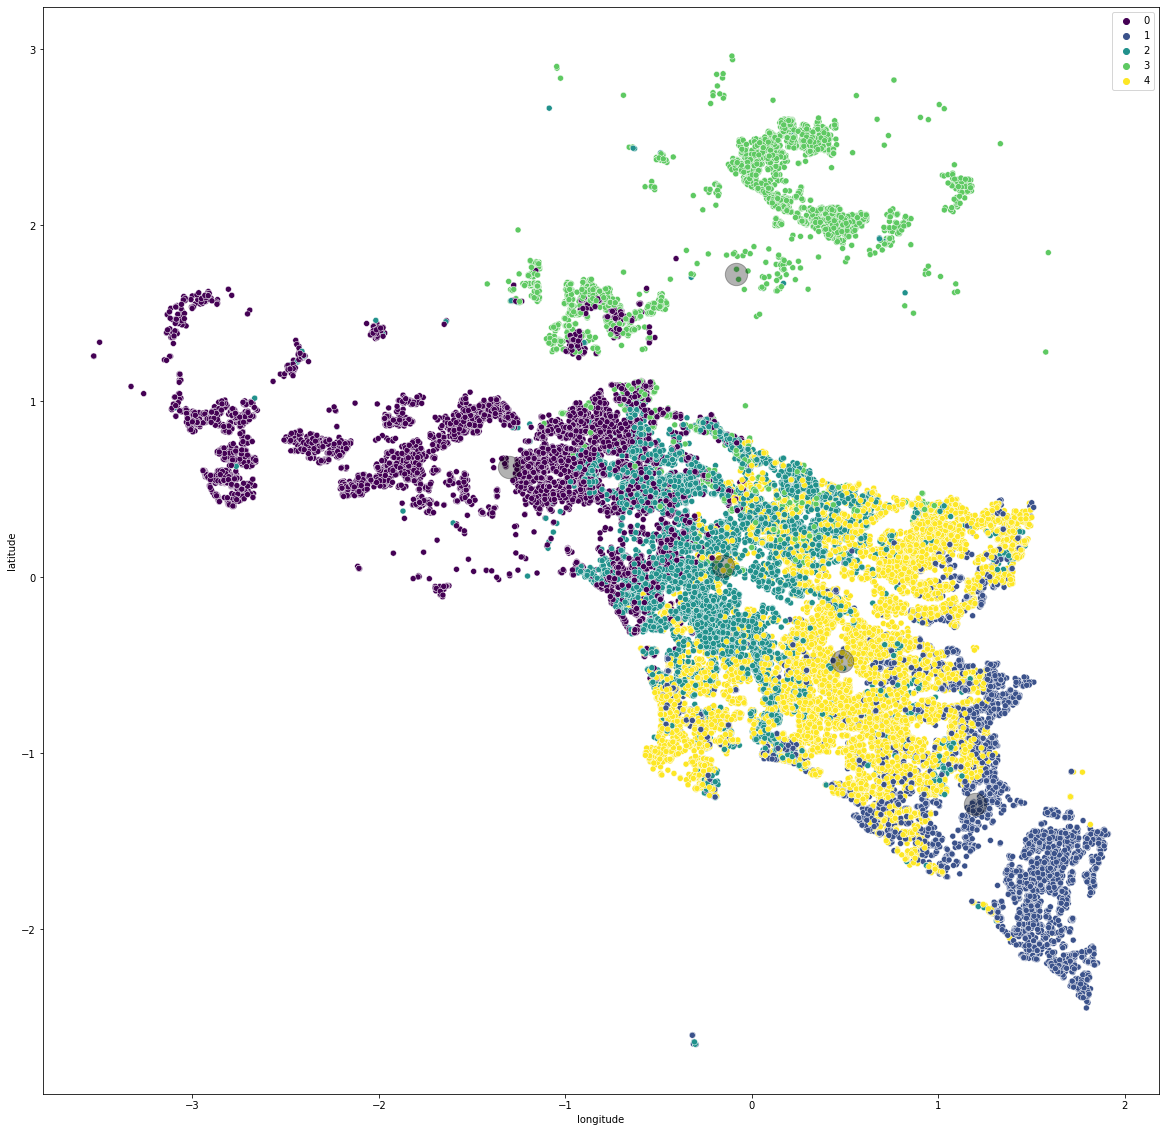

<Figure size 1008x648 with 0 Axes>

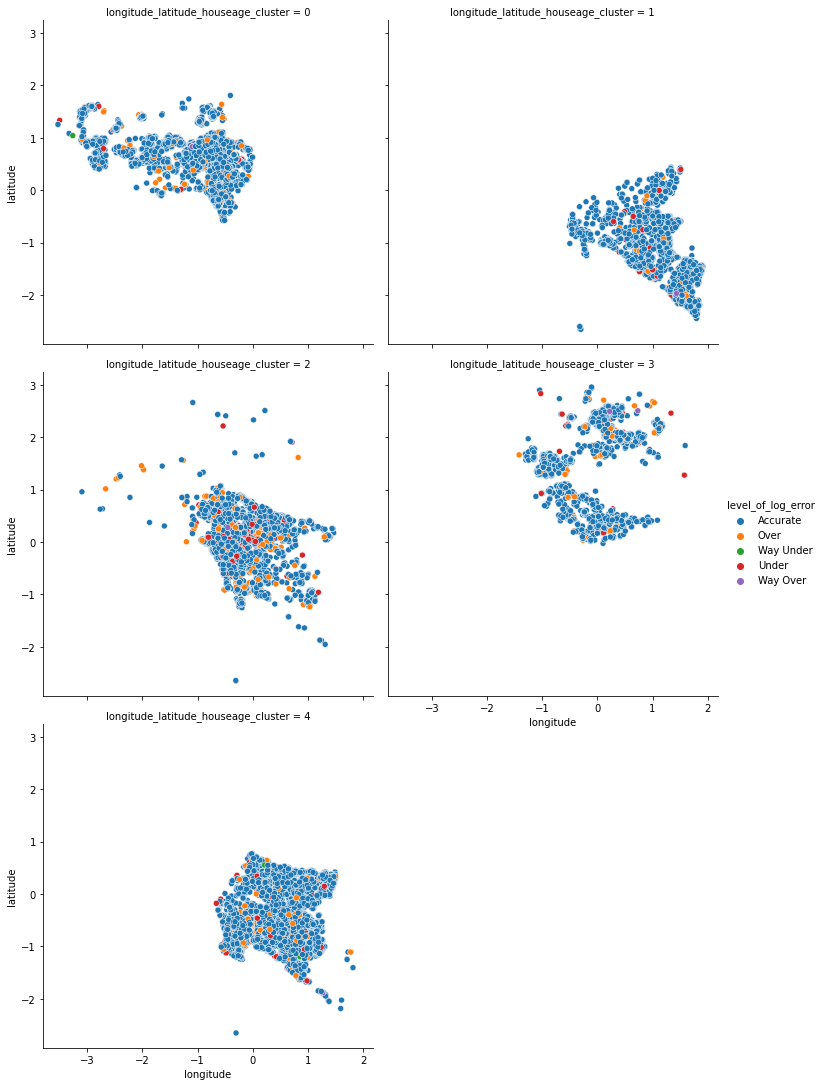

In [43]:
cluster_longitude_latitude_houseage(train)

In [ ]:
def get_dum_and_plot2(train):   
    dummy_df =  pd.get_dummies(train['longitude_latitude_houseage_cluster'])
    dummy_df.columns = ['zero', 'one', 'two', 'three', 'four']
    df = pd.concat([train, dummy_df], axis=1)

    df1 = df.groupby(['zero','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()
    df1.head()

    df2= df.groupby(['one','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df2.head()

    df3= df.groupby(['two','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df3.head()

    df4= df.groupby(['three','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()

    df4.head()

    df5 = df.groupby(['four','level_of_log_error']).size().reset_index().groupby('level_of_log_error')[[0]].max()
    df5.head()

    
    # Plot the clusters
    plt.figure(figsize=(20, 40))

    
    plt.subplot(5,1,1)
    plt.title("Percents of Each Log Error Level for Ventura", size=20, color='black')

    sns.barplot(y=df.zero, x='level_of_log_error', data=df,

                   palette='viridis')

    plt.subplot(5,1,2)
    plt.title("Percents of Each Log Error Level for Orange County", size=20, color='black')
    sns.barplot(y=df.one, x='level_of_log_error', data=df,
                   palette='viridis')

    plt.subplot(5,1,3)
    plt.title("Percents of Each Log Error Level for North downtown LA", size=20, color='black')
    sns.barplot(y=df.two, x='level_of_log_error', data=df,
                   palette='viridis')

    plt.subplot(5,1,4)
    plt.title("Percents of Each Log Error Level for East downtown LA", size=20, color='black')
    sns.barplot(y=df.three, x='level_of_log_error', data=df,
                   palette='viridis')
    
    plt.subplot(5,1,5)
    plt.title("Percents of Each Log Error Level for ", size=20, color='black')
    sns.barplot(y=df.four, x='level_of_log_error', data=df,
                   palette='viridis')
